In [1]:
from dqn_agent import DQNAgent
from environment import TrafficLightEnv
import utils as utils
import numpy as np

# Hyperparameters

In [2]:
ROAD_COUNTS = 4
CHANGE_SIZE = 10
MAX_STATE_VALUE = 500

In [3]:
EPSILON=1.0
EPSILON_MIN=0.01
EPSILON_DECAY=0.995
LR=0.001
GAMMA=0.9

# Deep Q Learning

In [4]:
env = TrafficLightEnv(roads_count=ROAD_COUNTS, change_size=CHANGE_SIZE, max_value=MAX_STATE_VALUE)
state_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]

# Initialize the DQN agent
agent = DQNAgent(state_size, action_size, epsilon_decay=0.995, epsilon_min=0.01, lr=0.001, gamma=0.9)

# Train the agent
EPISODES = 1000
total_rewards = []  # List to store rewards for each episode

for episode in range(1, EPISODES + 1):
    state = env.reset()
    done = False
    episode_reward = []

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        episode_reward.append(reward)

    env.render()
    agent.replay()
    total_rewards.append(episode_reward)
    print(f"Episode: {episode}/{EPISODES}, Total Reward: {np.sum(episode_reward)}\n")

green light timer [370. 190. 305. 101.]
avg waiting times (-) [596. 776. 661. 865.]
vehicles counts (-) [216. 484.  92. 452.]
in counts (+) [370. 190. 305. 101.]
out counts (+) [680. 145. 116.  25.]
avg speeds (+) [ 75. 496. 206. 363.]
Episode: 1/1000, Total Reward: -470571.0

green light timer [485. 406. 446. 153.]
avg waiting times (-) [1005. 1084. 1044. 1337.]
vehicles counts (-) [ 42. 114. 194. 412.]
in counts (+) [239. 406. 386. 153.]
out counts (+) [201. 284. 215. 485.]
avg speeds (+) [108.   8.  89. 124.]
Episode: 2/1000, Total Reward: -442563.0

green light timer [533. 708. 521. 697.]
avg waiting times (-) [1926. 1751. 1938. 1762.]
vehicles counts (-) [472.  80. 371. 211.]
in counts (+) [215. 330. 463. 148.]
out counts (+) [322. 578. 247.   9.]
avg speeds (+) [117. 235. 223. 400.]
Episode: 3/1000, Total Reward: -648213.0

green light timer [464. 228. 134. 337.]
avg waiting times (-) [ 699.  935. 1029.  826.]
vehicles counts (-) [102.   4. 137. 369.]
in counts (+) [369. 110.  72

In [5]:
agent.epsilon

0.00998645168764533

# Result

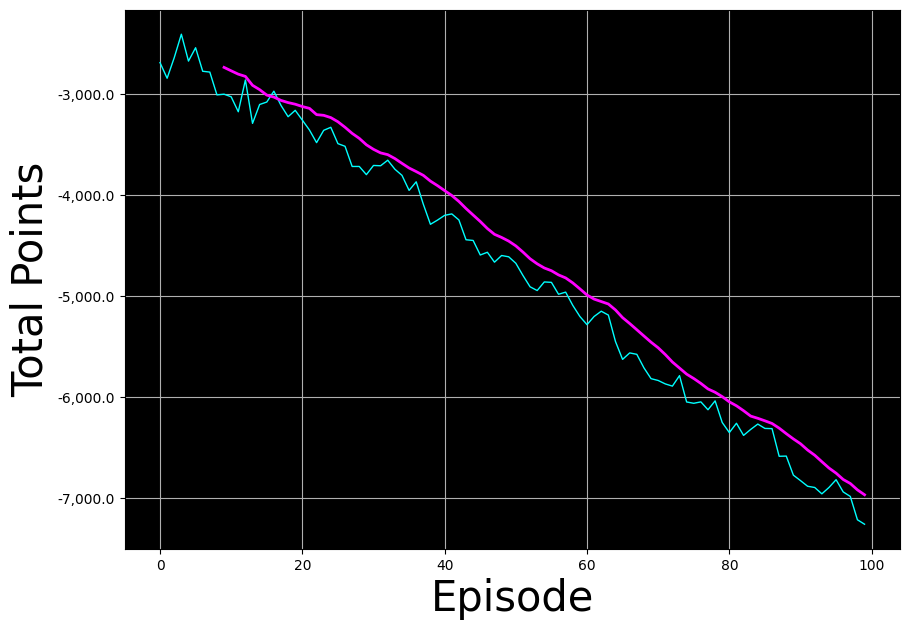

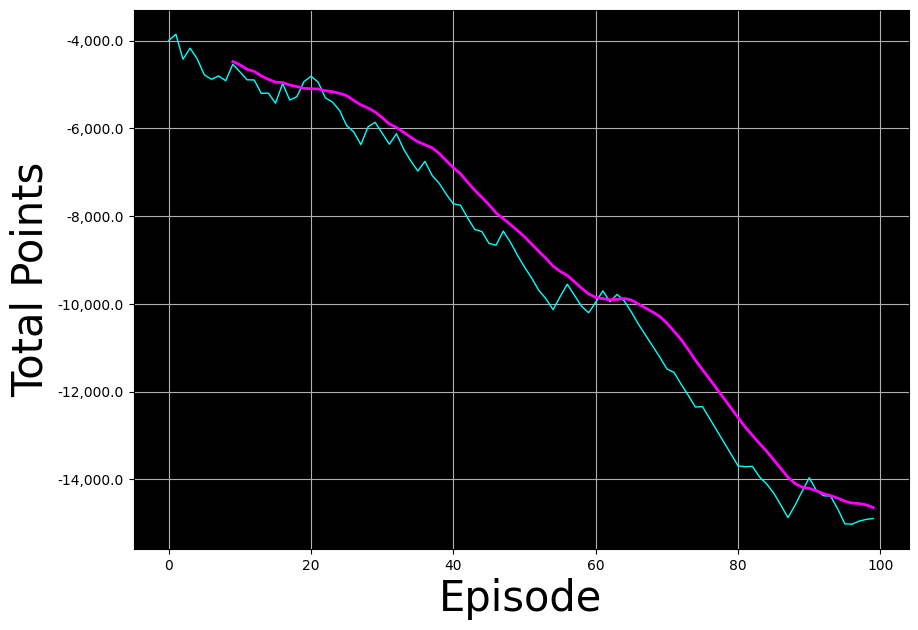

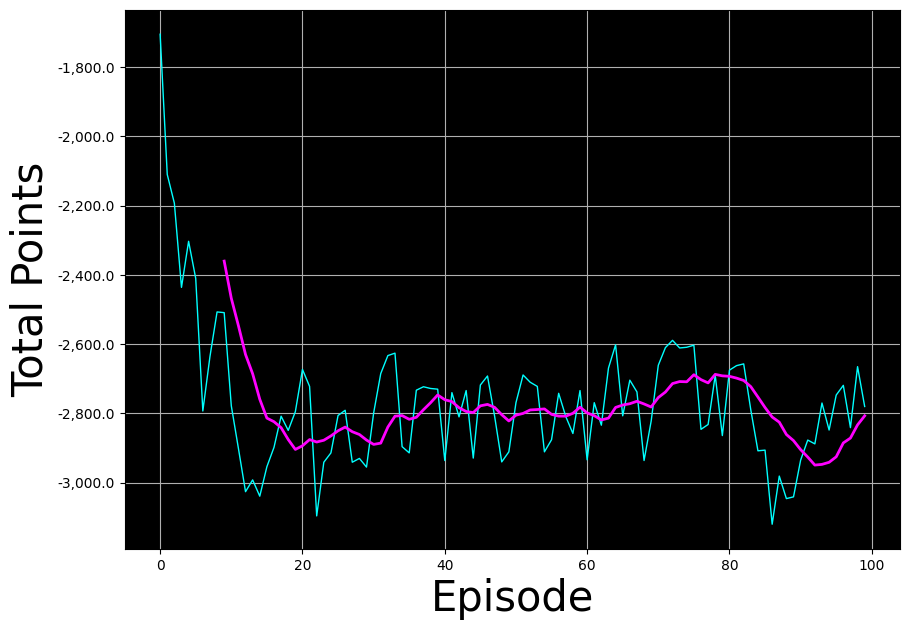

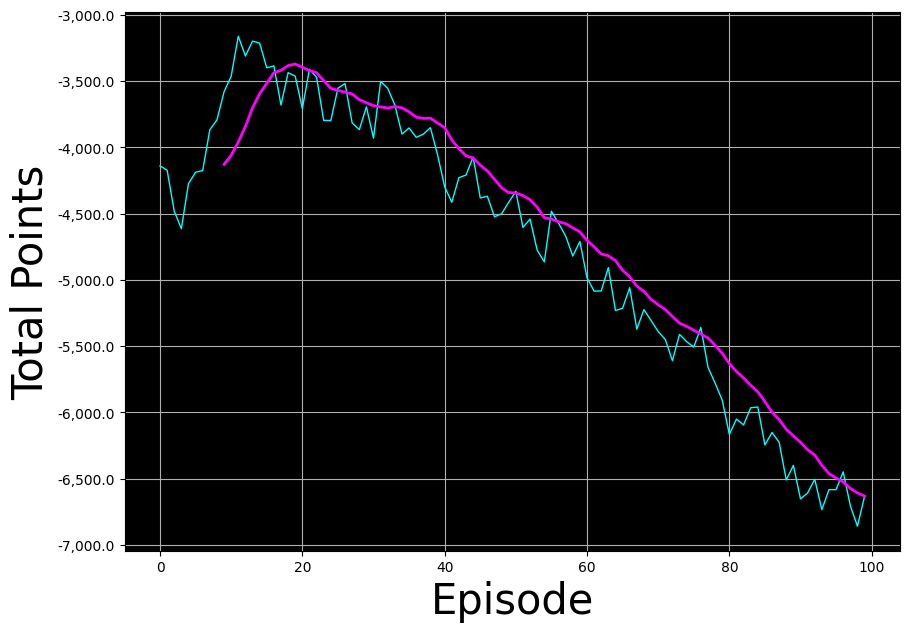

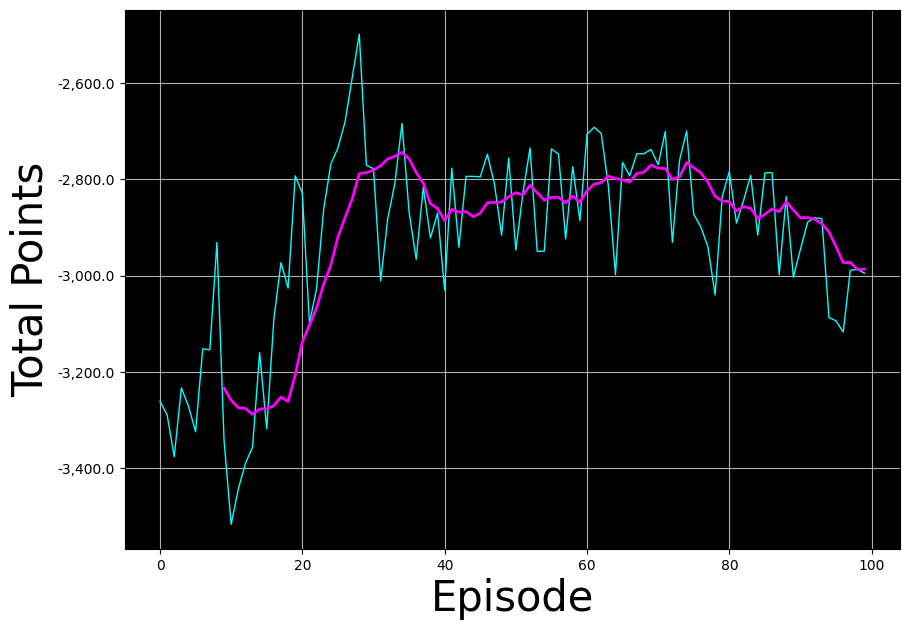

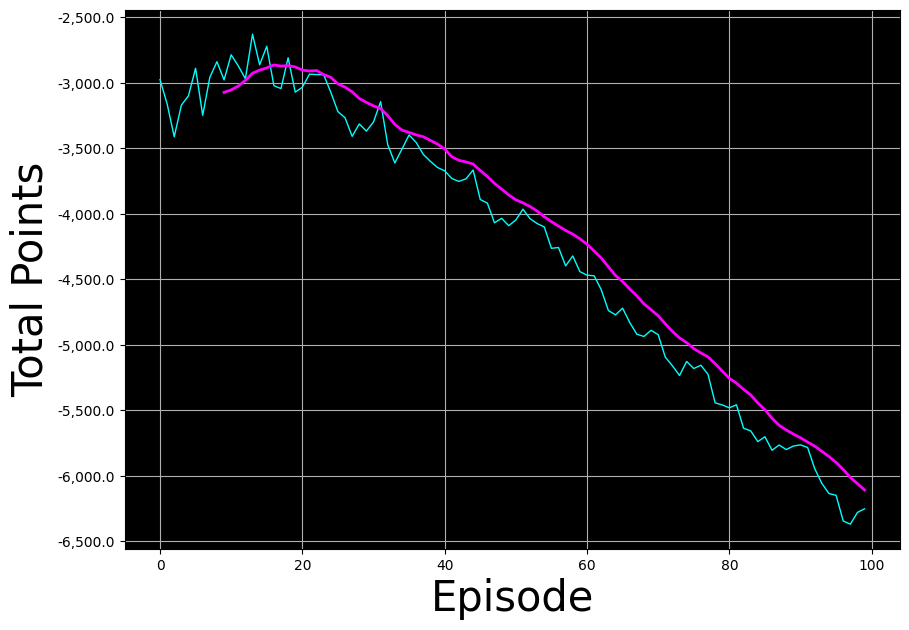

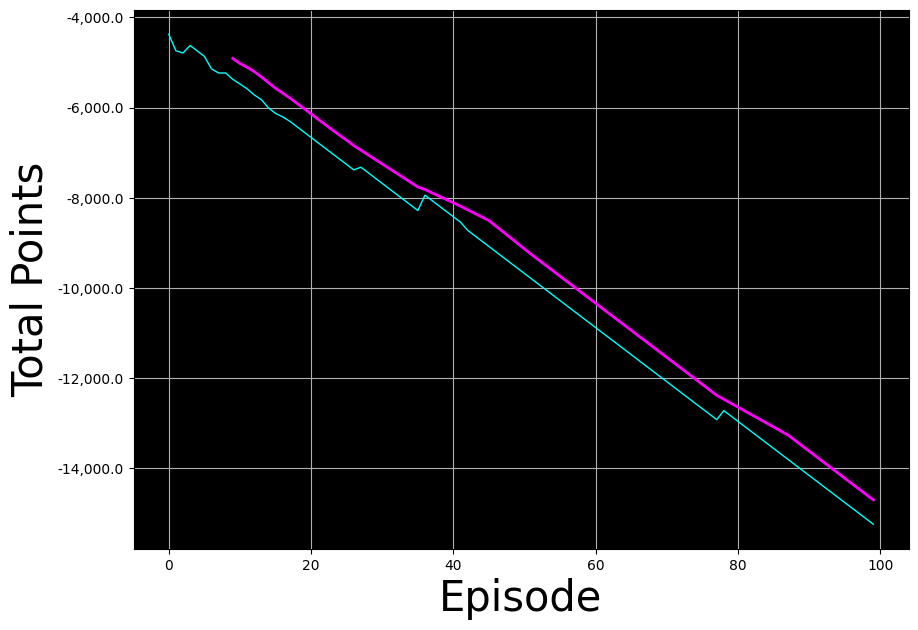

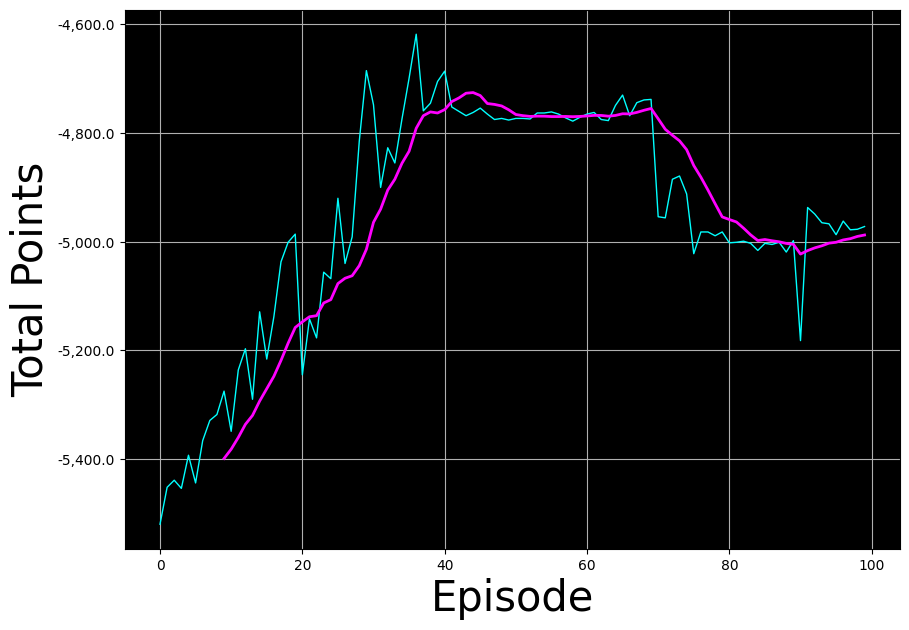

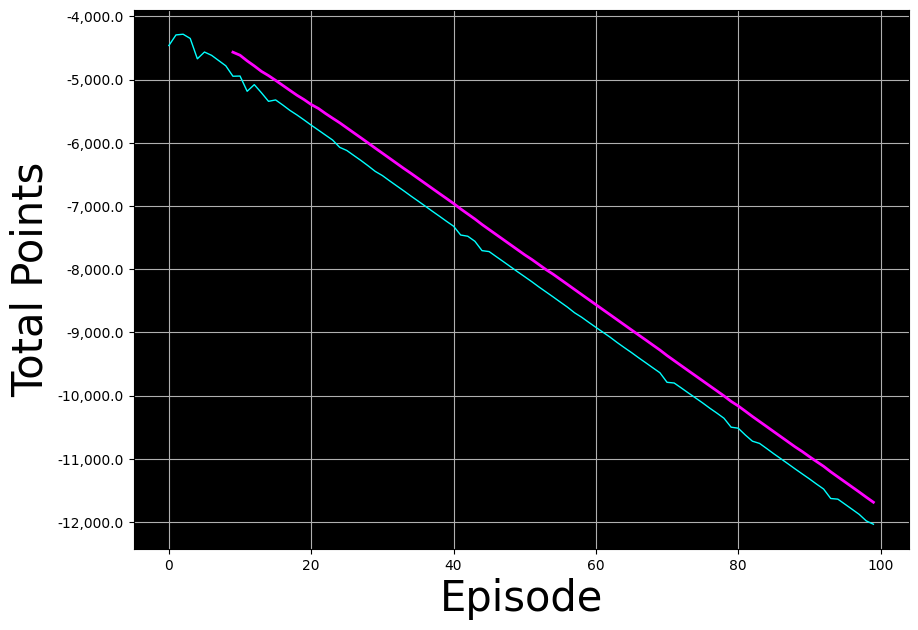

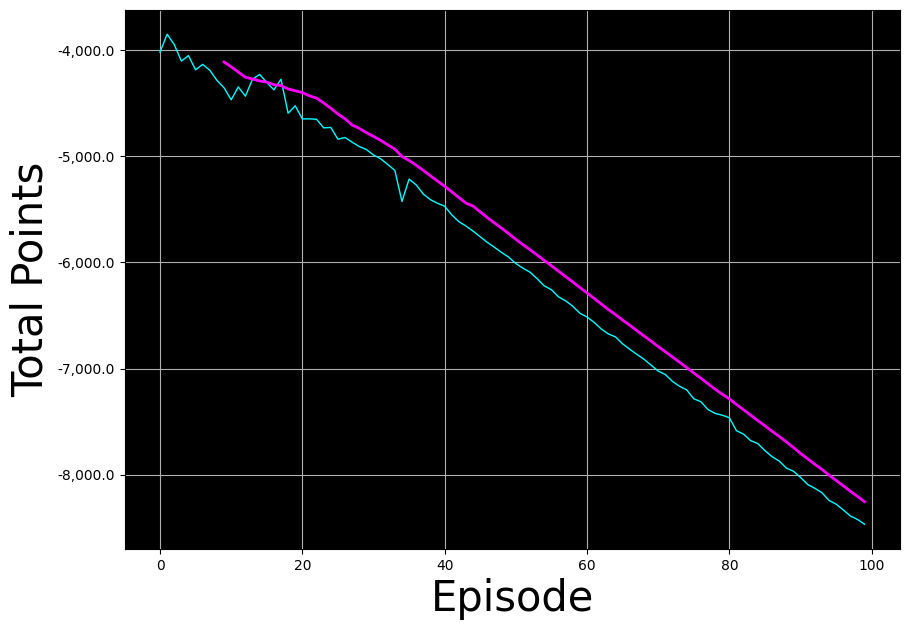

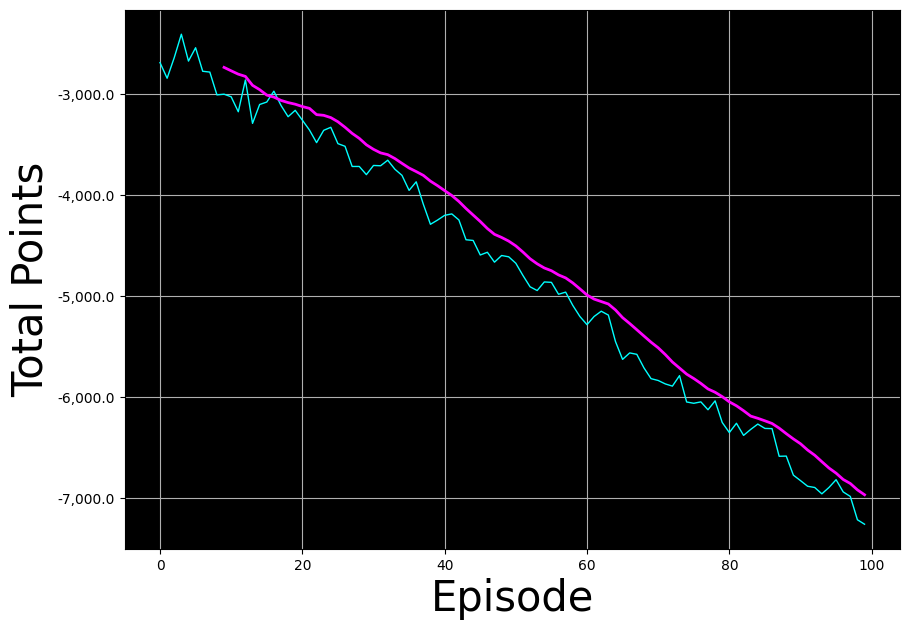

In [6]:
step = 0
while step <= 10:
    utils.plot_history(total_rewards[step*100-1])
    step += 1

In [20]:
state = env.reset()
done = False
while not done:
    env.render()
    state = env.state
    action = agent.act(state)
    print('action taken:', env.cast_action(action))
    print('reward:', reward)
    state, reward, done, _ = env.step(action)
    print('')
env.render()

green light timer [ 73. 358. 404. 116.]
avg waiting times (-) [878. 593. 547. 835.]
vehicles counts (-) [216.  10.  70. 161.]
in counts (+) [231. 488.  43. 353.]
out counts (+) [374. 158. 203.  40.]
avg speeds (+) [228. 278. 351. 147.]
action taken: [0 1 2 0 0]
reward: -9030.0

green light timer [ 43. 338. 394.  86.]
avg waiting times (-) [818. 523. 467. 775.]
vehicles counts (-) [194. 493. 291. 349.]
in counts (+) [43. 10. 70. 86.]
out counts (+) [20. 46. 97. 46.]
avg speeds (+) [228. 278. 351. 147.]
action taken: [0 1 2 0 0]
reward: -3533.0

green light timer [ 13. 318. 384.  56.]
avg waiting times (-) [758. 453. 387. 715.]
vehicles counts (-) [466. 466. 157. 470.]
in counts (+) [ 13. 318. 291.  56.]
out counts (+) [243.  14. 206. 215.]
avg speeds (+) [228. 278. 351. 147.]
action taken: [0 1 2 0 0]
reward: -3704.0

green light timer [  3. 318. 394.  46.]
avg waiting times (-) [758. 443. 367. 715.]
vehicles counts (-) [477. 364. 450. 470.]
in counts (+) [  3. 318. 157.  46.]
out count